# 常用的 DataFrame 操作
* merge / transform
* subset
* groupby

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 設定 data_path
dir_data = './data/'

In [32]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 作業
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    * 0 個小孩
    * 有 1 - 2 個小孩
    * 有 3 - 5 個小孩
    * 有超過 5 個小孩

2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

In [33]:
print(app_train.CNT_CHILDREN.head())
print(app_train.CNT_CHILDREN.describe())
print(app_train.CNT_CHILDREN.value_counts(ascending=True).sort_index())

0    0
1    0
2    0
3    0
4    0
Name: CNT_CHILDREN, dtype: int64
count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64
0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
8          2
9          2
10         2
11         1
12         2
14         3
19         2
Name: CNT_CHILDREN, dtype: int64


In [34]:
#1
"""
Your code here
"""
cut_rule = [0, 1,2,3,5,app_train.CNT_CHILDREN.max()]

# q_50 = app_train.CNT_CHILDREN.mean()
# app_train.loc[~app_train.CNT_CHILDREN.isna(), "CNT_CHILDREN"] = q_50
app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, cut_rule, include_lowest=True)
print(app_train['CNT_CHILDREN_GROUP'])
print(app_train['CNT_CHILDREN_GROUP'].value_counts())

0         (-0.001, 1.0]
1         (-0.001, 1.0]
2         (-0.001, 1.0]
3         (-0.001, 1.0]
4         (-0.001, 1.0]
5         (-0.001, 1.0]
6         (-0.001, 1.0]
7         (-0.001, 1.0]
8         (-0.001, 1.0]
9         (-0.001, 1.0]
10        (-0.001, 1.0]
11        (-0.001, 1.0]
12        (-0.001, 1.0]
13        (-0.001, 1.0]
14        (-0.001, 1.0]
15        (-0.001, 1.0]
16        (-0.001, 1.0]
17        (-0.001, 1.0]
18        (-0.001, 1.0]
19        (-0.001, 1.0]
20        (-0.001, 1.0]
21        (-0.001, 1.0]
22        (-0.001, 1.0]
23        (-0.001, 1.0]
24           (1.0, 2.0]
25        (-0.001, 1.0]
26        (-0.001, 1.0]
27        (-0.001, 1.0]
28        (-0.001, 1.0]
29        (-0.001, 1.0]
              ...      
307481    (-0.001, 1.0]
307482    (-0.001, 1.0]
307483    (-0.001, 1.0]
307484    (-0.001, 1.0]
307485    (-0.001, 1.0]
307486    (-0.001, 1.0]
307487    (-0.001, 1.0]
307488    (-0.001, 1.0]
307489    (-0.001, 1.0]
307490    (-0.001, 1.0]
307491       (1.

In [55]:
#2-1
"""
Your code here
"""
grp = ['CNT_CHILDREN_GROUP']

grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
print(grouped_df.value_counts())
print(grouped_df.mean())

CNT_CHILDREN_GROUP  AMT_INCOME_TOTAL
(-0.001, 1.0]       135000.0            32091
                    112500.0            27941
                    157500.0            23911
                    180000.0            22082
                    90000.0             20117
                    225000.0            18530
                    202500.0            14737
                    67500.0              9938
                    270000.0             9648
                    81000.0              5381
                    315000.0             5178
                    247500.0             4834
                    126000.0             4237
                    360000.0             3645
                    121500.0             3477
                    99000.0              3315
                    292500.0             3093
                    103500.0             3022
                    76500.0              2826
                    144000.0             2809
                    171000.0             23

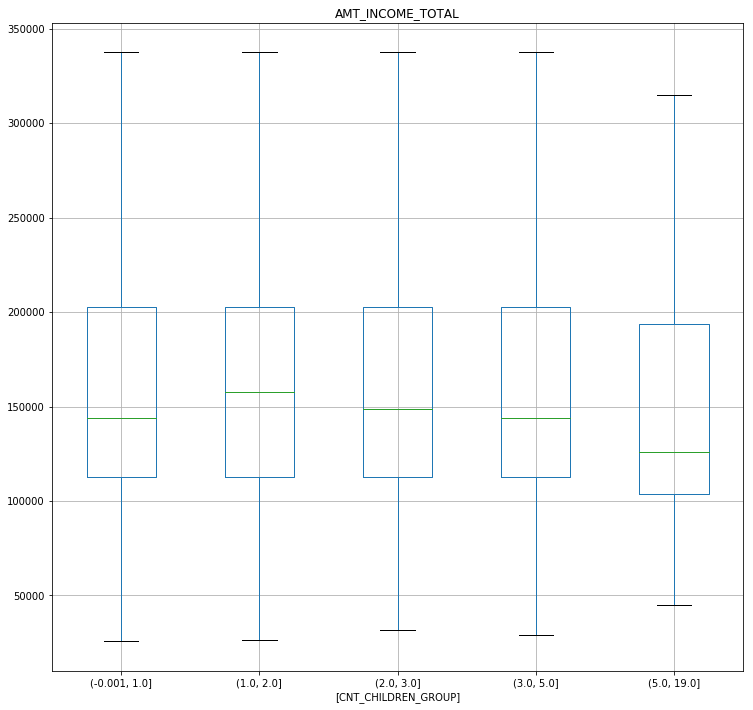

In [60]:
#2-2
"""
Your code here
"""

plt_column = ['AMT_INCOME_TOTAL']
plt_by = ['CNT_CHILDREN_GROUP']

app_train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
plt.suptitle('')
plt.show()

In [53]:
#3
"""
Your code here
"""

grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']

app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda x: (x-x.mean())/x.std()   )

print(app_train[['CNT_CHILDREN_GROUP', 'AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head())

  CNT_CHILDREN_GROUP  AMT_INCOME_TOTAL  \
0      (-0.001, 1.0]          202500.0   
1      (-0.001, 1.0]          270000.0   
2      (-0.001, 1.0]           67500.0   
3      (-0.001, 1.0]          135000.0   
4      (-0.001, 1.0]          121500.0   

   AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET  
0                                   0.139137  
1                                   0.414243  
2                                  -0.411074  
3                                  -0.135968  
4                                  -0.190990  
